In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


np.set_printoptions(precision=3)
pd.set_option('precision', 3)
from sklearn.ensemble import RandomForestClassifier

In [14]:
data = pd.read_csv('train.csv', index_col=0)

#### Подробная обработка

максимальная новая

In [15]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0},
'Married': {'Yes': 1, 'No': 0},
'Phone': {'Yes': 1, 'No': 0},
'Dependents': {'Yes': 1, 'No': 0},
'EBilling': {'Yes': 1, 'No': 0},
'Security': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Support': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'TV': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0 }
})
data=data.drop_duplicates()
data.Tenure = data.Tenure.replace(0, 1).astype(float)
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data = data.drop("Phone", axis=1)
data['avgMonthCharge'] = data['TotalCharges']/data['Tenure']
data = data.drop("MonthlyCharges", axis=1)
data = data.drop("TotalCharges", axis=1)

X, Y = data.drop(['Churn'], axis=1), data['Churn']
X_dummies = pd.get_dummies(X, drop_first = True)
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_dummies)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 5)
X_test_dummies = pd.get_dummies(X_test, drop_first = True)
X_train_dummies = pd.get_dummies(X_train, drop_first = True)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_dummies)
X_test_scaled = std_scaler.transform(X_test_dummies)

максимальная старая

In [3]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0}
                    })
data=data.drop_duplicates()
data.Tenure = data.Tenure.replace(0, 1).astype(float)
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data = data.drop("Phone", axis=1)
data['avgMonthCharge'] = data['TotalCharges']/data['Tenure']
data = data.drop("MonthlyCharges", axis=1)
data = data.drop("TotalCharges", axis=1)

X, Y = data.drop(['Churn'], axis=1), data['Churn']
X_dummies = pd.get_dummies(X, drop_first = True)
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_dummies)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 5)
X_test_dummies = pd.get_dummies(X_test, drop_first = True)
X_train_dummies = pd.get_dummies(X_train, drop_first = True)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_dummies)
X_test_scaled = std_scaler.transform(X_test_dummies)

минимальная новая

In [3]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0},
'Married': {'Yes': 1, 'No': 0},
'Phone': {'Yes': 1, 'No': 0},
'Dependents': {'Yes': 1, 'No': 0},
'EBilling': {'Yes': 1, 'No': 0},
'Security': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Support': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'TV': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0 }
})
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)

X, Y = data.drop(['Churn'], axis=1), data['Churn']
X_dummies = pd.get_dummies(X, drop_first = True)
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_dummies)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 5)
X_test_dummies = pd.get_dummies(X_test, drop_first = True)
X_train_dummies = pd.get_dummies(X_train, drop_first = True)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_dummies)
X_test_scaled = std_scaler.transform(X_test_dummies)


минимальная старая

In [107]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0}
                    })
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)

X, Y = data.drop(['Churn'], axis=1), data['Churn']
X_dummies = pd.get_dummies(X, drop_first = True)
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_dummies)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 5)
X_test_dummies = pd.get_dummies(X_test, drop_first = True)
X_train_dummies = pd.get_dummies(X_train, drop_first = True)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_dummies)
X_test_scaled = std_scaler.transform(X_test_dummies)

In [3]:
for i in data.columns:
    print(data[i].value_counts())

#### Что можно изменить?
Атрибуты, связанные с наличием интернета <br>
Все бинарные заменить на 0 и 1 <br>
TotalCharges <br>
Tenure <br>
MonthlyCharges <br>
Phone и MultiplePhones <br>
Дамми-кодирование номинальных <br>

In [8]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0},
'Married': {'Yes': 1, 'No': 0},
'Phone': {'Yes': 1, 'No': 0},
'Dependents': {'Yes': 1, 'No': 0},
'EBilling': {'Yes': 1, 'No': 0},
'Security': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Support': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'TV': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0 }
})

<AxesSubplot:xlabel='Tenure'>

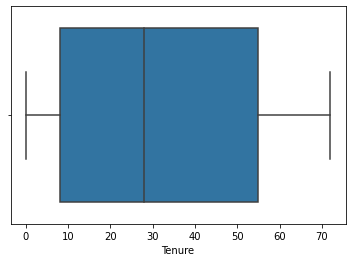

In [9]:
sns.boxplot(x='Tenure', data=data)

<AxesSubplot:xlabel='MonthlyCharges'>

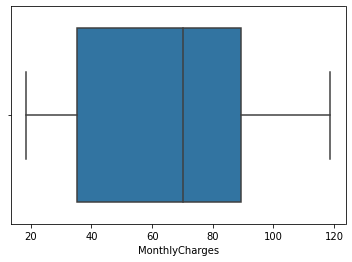

In [10]:
sns.boxplot(x='MonthlyCharges', data=data)

<AxesSubplot:xlabel='TotalCharges'>

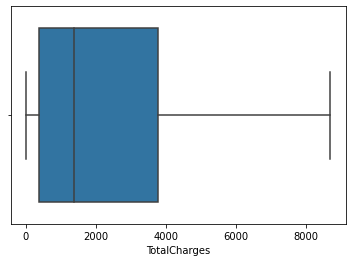

In [12]:
data.Tenure = data.Tenure.replace(0, 1).astype(float)
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
sns.boxplot(x='TotalCharges', data=data)

Пропусков нет, выбросов нет

Phone можно убрать, т. к. признак MultiplePhones и так содержит информацию о том, подключен ли телефон или нет

<AxesSubplot:>

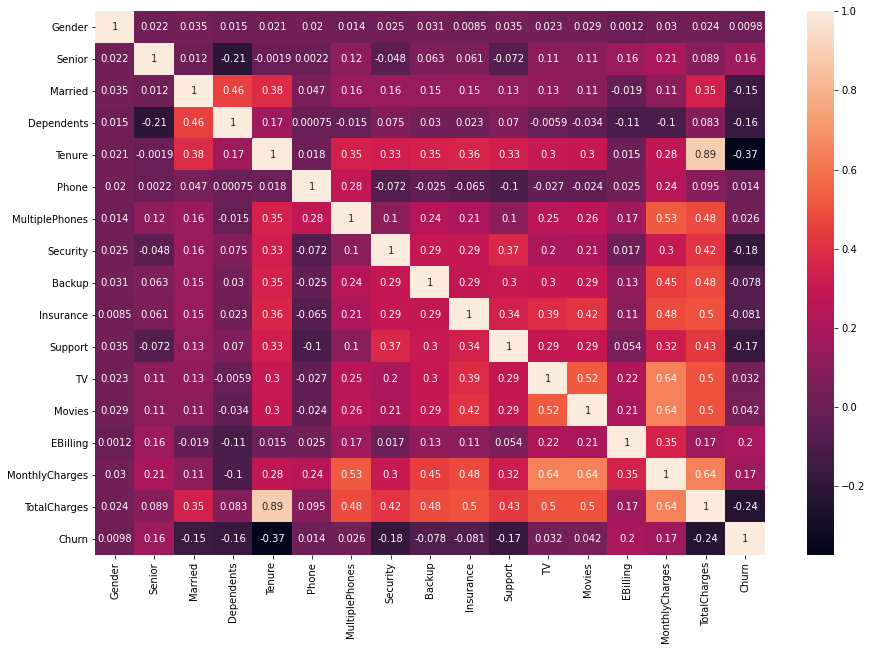

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method = 'spearman'), annot = True)

Высокая корреляция между TotalCharges и Tenure

In [ ]:
data['avgMonthCharge'] = data['TotalCharges']/data['Tenure']
data = data.drop("MonthlyCharges", axis=1)
data = data.drop("TotalCharges", axis=1)

<AxesSubplot:>

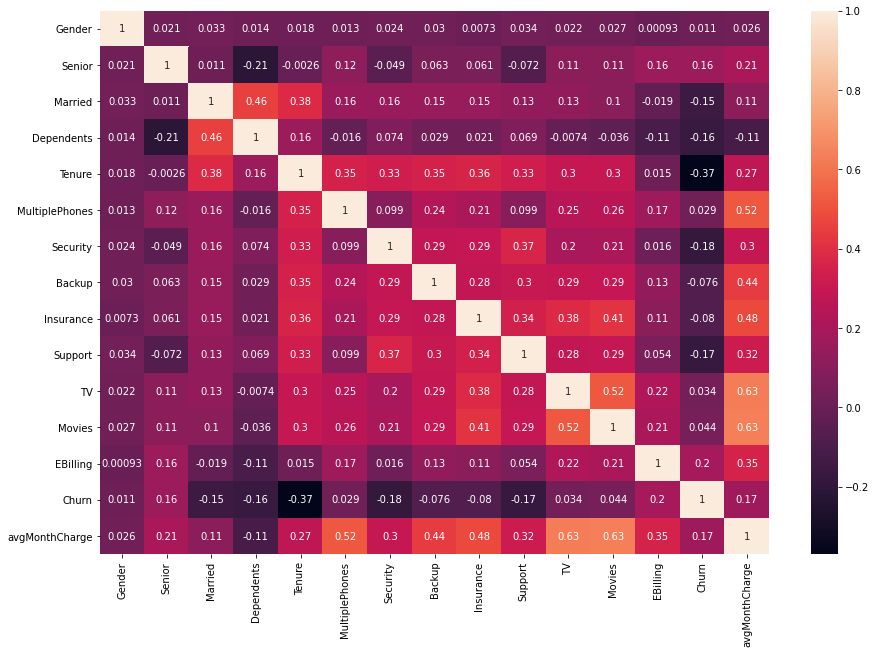

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method = 'spearman'), annot = True)

## Случайный лес

In [14]:
model = RandomForestClassifier(random_state = 10, n_estimators = 100)
model.fit(X_train_dummies, Y_train)
model_predictions = model.predict(X_test_dummies)

максимальная старая

In [24]:
print(roc_auc_score(Y_test, model_predictions))
print (classification_report(Y_test, model_predictions))
print(matthews_corrcoef(Y_test, model_predictions))

0.6899353019980825
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       659
        True       0.64      0.48      0.55       239

    accuracy                           0.79       898
   macro avg       0.73      0.69      0.70       898
weighted avg       0.78      0.79      0.78       898

0.4211153728857083


с минимальной предобработкой

In [15]:
print(roc_auc_score(Y_test, model_predictions))
print (classification_report(Y_test, model_predictions))
print(matthews_corrcoef(Y_test, model_predictions))

0.6920273522072875
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       659
        True       0.64      0.48      0.55       239

    accuracy                           0.79       898
   macro avg       0.73      0.69      0.71       898
weighted avg       0.78      0.79      0.78       898

0.424857986337753


In [5]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 2000, num = 100)]
max_depth.append(None)

param_grid = { 
    'n_estimators': n_estimators,
    'max_features': ['sqrt', 'log2', 1, 2],
    'max_depth' : max_depth,
    'criterion' :['gini', 'entropy']
}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=10), param_distributions = param_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_dummies, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', 1, 2],
                                        'n_estimators': [300, 317, 334, 351,
                                                         368, 385, 403, 420,
                                                         437, 454, 471, 488,
                                                         506, 523, 540, 557,
                                                         574, 591, 609, 626,
                                                         643, 660, 677, 694,
                                                   

In [8]:
rf_random.best_params_

{'n_estimators': 1948,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

Лучшее для Random Forest

старая максимальная

In [24]:
rf_random_model_best=RandomForestClassifier(n_estimators= 1948, max_features= 'sqrt', max_depth= 10,
                                            criterion= 'entropy')
rf_random_model_best=rf_random_model_best.fit(X_train_dummies, Y_train)
rf_random_pred_b = rf_random_model_best.predict(X_test_dummies)
print(roc_auc_score(Y_test, rf_random_pred_b))
print (classification_report(Y_test, rf_random_pred_b))
print(matthews_corrcoef(Y_test, rf_random_pred_b))

0.7159827556650434
              precision    recall  f1-score   support

       False       0.84      0.91      0.87       659
        True       0.68      0.52      0.59       239

    accuracy                           0.81       898
   macro avg       0.76      0.72      0.73       898
weighted avg       0.80      0.81      0.80       898

0.4720196757575701


старая минимальная

In [36]:
rf_random_model_best=RandomForestClassifier(n_estimators= 1948, max_features= 'sqrt', max_depth= 10,
                                            criterion= 'entropy')
rf_random_model_best=rf_random_model_best.fit(X_train_dummies, Y_train)
rf_random_pred_b = rf_random_model_best.predict(X_test_dummies)
print(roc_auc_score(Y_test, rf_random_pred_b))
print (classification_report(Y_test, rf_random_pred_b))
print(matthews_corrcoef(Y_test, rf_random_pred_b))

0.7036145802248874
              precision    recall  f1-score   support

       False       0.83      0.91      0.87       659
        True       0.67      0.49      0.57       239

    accuracy                           0.80       898
   macro avg       0.75      0.70      0.72       898
weighted avg       0.79      0.80      0.79       898

0.4543519054630784


максимальная новая

In [61]:
rf_random_model_best=RandomForestClassifier(n_estimators= 1948, max_features= 'sqrt', max_depth= 10,
                                            criterion= 'entropy')
rf_random_model_best=rf_random_model_best.fit(X_train_dummies, Y_train)
rf_random_pred_b = rf_random_model_best.predict(X_test_dummies)
print(roc_auc_score(Y_test, rf_random_pred_b))
print (classification_report(Y_test, rf_random_pred_b))
print(matthews_corrcoef(Y_test, rf_random_pred_b))

0.7246115134169531
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       659
        True       0.65      0.56      0.60       237

    accuracy                           0.80       896
   macro avg       0.75      0.72      0.73       896
weighted avg       0.80      0.80      0.80       896

0.4733302425716399


минимальная новая

In [35]:
rf_random_model_best=RandomForestClassifier(n_estimators= 1948, max_features= 'sqrt', max_depth= 10,
                                            criterion= 'entropy')
rf_random_model_best=rf_random_model_best.fit(X_train_dummies, Y_train)
rf_random_pred_b = rf_random_model_best.predict(X_test_dummies)
print(roc_auc_score(Y_test, rf_random_pred_b))
print (classification_report(Y_test, rf_random_pred_b))
print(matthews_corrcoef(Y_test, rf_random_pred_b))

0.7093161313261502
              precision    recall  f1-score   support

       False       0.84      0.92      0.87       659
        True       0.69      0.50      0.58       239

    accuracy                           0.81       898
   macro avg       0.76      0.71      0.73       898
weighted avg       0.80      0.81      0.80       898

0.4670745238732764


## Наивный Байеc

In [17]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(X_train_scaled, Y_train)
gNB_predictions = gNB.predict(X_test_scaled)

максимальная старая

In [30]:
print(roc_auc_score(Y_test, gNB_predictions))
print (classification_report(Y_test, gNB_predictions))
print(matthews_corrcoef(Y_test, gNB_predictions))

0.7553507596777163
              precision    recall  f1-score   support

       False       0.94      0.62      0.75       659
        True       0.46      0.89      0.61       239

    accuracy                           0.69       898
   macro avg       0.70      0.76      0.68       898
weighted avg       0.81      0.69      0.71       898

0.45153647324771873


минимальная старая

In [18]:
print(roc_auc_score(Y_test, gNB_predictions))
print (classification_report(Y_test, gNB_predictions))
print(matthews_corrcoef(Y_test, gNB_predictions))

0.7578110615170697
              precision    recall  f1-score   support

       False       0.94      0.63      0.76       659
        True       0.47      0.88      0.61       239

    accuracy                           0.70       898
   macro avg       0.70      0.76      0.68       898
weighted avg       0.81      0.70      0.72       898

0.45576827746224924


Кросс-валидация

In [31]:
gNB_cv_predictions = cross_val_predict(GaussianNB(), X_scaled, Y, cv=10)
print(roc_auc_score(Y, gNB_cv_predictions))
print (classification_report(Y, gNB_cv_predictions))
print(matthews_corrcoef(Y, gNB_cv_predictions))

0.7351506252368322
              precision    recall  f1-score   support

       False       0.93      0.60      0.73      2639
        True       0.44      0.88      0.58       952

    accuracy                           0.67      3591
   macro avg       0.68      0.74      0.65      3591
weighted avg       0.80      0.67      0.69      3591

0.41589135416447703


In [19]:
gNB_cv_predictions = cross_val_predict(GaussianNB(), X_scaled, Y, cv=10)
print(roc_auc_score(Y, gNB_cv_predictions))
print (classification_report(Y, gNB_cv_predictions))
print(matthews_corrcoef(Y, gNB_cv_predictions))

0.738484385796759
              precision    recall  f1-score   support

       False       0.93      0.61      0.74      2639
        True       0.44      0.87      0.59       952

    accuracy                           0.68      3591
   macro avg       0.69      0.74      0.66      3591
weighted avg       0.80      0.68      0.70      3591

0.4213059731088554


#### Complement Naive Bayes

In [15]:
from sklearn.naive_bayes import ComplementNB

cNB = ComplementNB()
cNB.fit(X_train_dummies, Y_train)
cNB_predictions = cNB.predict(X_test_dummies)

максимальная старая

In [16]:
print(roc_auc_score(Y_test, cNB_predictions))
print (classification_report(Y_test, cNB_predictions))
print(matthews_corrcoef(Y_test, cNB_predictions))

0.7382968997022241
              precision    recall  f1-score   support

       False       0.89      0.72      0.80       659
        True       0.49      0.76      0.60       239

    accuracy                           0.73       898
   macro avg       0.69      0.74      0.70       898
weighted avg       0.79      0.73      0.74       898

0.42864097754344344


минимальная старая

In [21]:
print(roc_auc_score(Y_test, cNB_predictions))
print (classification_report(Y_test, cNB_predictions))
print(matthews_corrcoef(Y_test, cNB_predictions))

0.69695747963505
              precision    recall  f1-score   support

       False       0.88      0.63      0.73       659
        True       0.43      0.77      0.55       239

    accuracy                           0.66       898
   macro avg       0.65      0.70      0.64       898
weighted avg       0.76      0.66      0.68       898

0.3485566060355673


Кросс-валидация

In [34]:
cNB_cv_predictions = cross_val_predict(ComplementNB(), X_dummies, Y, cv=10)
print(roc_auc_score(Y, cNB_cv_predictions))
print (classification_report(Y, cNB_cv_predictions))
print(matthews_corrcoef(Y, cNB_cv_predictions))

0.7339511401377526
              precision    recall  f1-score   support

       False       0.89      0.72      0.79      2639
        True       0.49      0.75      0.59       952

    accuracy                           0.73      3591
   macro avg       0.69      0.73      0.69      3591
weighted avg       0.78      0.73      0.74      3591

0.42019112825099064


In [22]:
cNB_cv_predictions = cross_val_predict(ComplementNB(), X_dummies, Y, cv=10)
print(roc_auc_score(Y, cNB_cv_predictions))
print (classification_report(Y, cNB_cv_predictions))
print(matthews_corrcoef(Y, cNB_cv_predictions))

0.6990894501036489
              precision    recall  f1-score   support

       False       0.88      0.65      0.74      2639
        True       0.43      0.75      0.55       952

    accuracy                           0.67      3591
   macro avg       0.66      0.70      0.65      3591
weighted avg       0.76      0.67      0.69      3591

0.3526644410522458


## SVM

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_scaled, Y_train)
svm_model_pred = svm_model.predict(X_test_scaled)

максимальная старая

In [36]:
print(roc_auc_score(Y_test, svm_model_pred))
print (classification_report(Y_test, svm_model_pred))
print(matthews_corrcoef(Y_test, svm_model_pred))

0.6920051301261578
              precision    recall  f1-score   support

       False       0.83      0.92      0.87       659
        True       0.68      0.46      0.55       239

    accuracy                           0.80       898
   macro avg       0.75      0.69      0.71       898
weighted avg       0.79      0.80      0.79       898

0.43925279344925294


минимальная старая

In [24]:
print(roc_auc_score(Y_test, svm_model_pred))
print (classification_report(Y_test, svm_model_pred))
print(matthews_corrcoef(Y_test, svm_model_pred))

0.6948559056767893
              precision    recall  f1-score   support

       False       0.83      0.92      0.87       659
        True       0.68      0.47      0.56       239

    accuracy                           0.80       898
   macro avg       0.75      0.69      0.71       898
weighted avg       0.79      0.80      0.79       898

0.44577455212980965


Кросс-валидация

In [37]:
svm_cv_pred = cross_val_predict(SVC(), X_scaled, Y, cv = 10, n_jobs = -1)
print(roc_auc_score(Y, svm_cv_pred))
print (classification_report(Y, svm_cv_pred))
print(matthews_corrcoef(Y, svm_cv_pred))

0.6905537413904554
              precision    recall  f1-score   support

       False       0.83      0.91      0.86      2639
        True       0.64      0.48      0.55       952

    accuracy                           0.79      3591
   macro avg       0.74      0.69      0.71      3591
weighted avg       0.78      0.79      0.78      3591

0.423944873781972


In [25]:
svm_cv_pred = cross_val_predict(SVC(), X_scaled, Y, cv = 10, n_jobs = -1)
print(roc_auc_score(Y, svm_cv_pred))
print (classification_report(Y, svm_cv_pred))
print(matthews_corrcoef(Y, svm_cv_pred))

0.6965038004591758
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      2639
        True       0.66      0.48      0.56       952

    accuracy                           0.80      3591
   macro avg       0.74      0.70      0.71      3591
weighted avg       0.78      0.80      0.79      3591

0.43836633155287097


In [8]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'linear', 'sigmoid']}

svm_grid_model = GridSearchCV(estimator = SVC(), param_grid = param_grid, scoring='roc_auc', 
                                cv = 5, verbose=2, n_jobs = -1)
svm_grid_model.fit(X_train_dummies, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='roc_auc', verbose=2)

In [9]:
svm_grid_model.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

#### SVM  kernel='linear', C=0.1

In [5]:
svm_model_poly = SVC(kernel='linear', C=0.1)
svm_model_p = svm_model_poly.fit(X_train_scaled, Y_train)
svm_model_p_pred = svm_model_p.predict(X_test_scaled)

максимальная старая

In [124]:
print(roc_auc_score(Y_test, svm_model_p_pred))
print (classification_report(Y_test, svm_model_p_pred))
print(matthews_corrcoef(Y_test, svm_model_p_pred))

0.7198926899854657
              precision    recall  f1-score   support

       False       0.85      0.88      0.86       659
        True       0.62      0.56      0.59       237

    accuracy                           0.79       896
   macro avg       0.74      0.72      0.73       896
weighted avg       0.79      0.79      0.79       896

0.4556774261052953


Минимальная старая

In [114]:
print(roc_auc_score(Y_test, svm_model_p_pred))
print (classification_report(Y_test, svm_model_p_pred))
print(matthews_corrcoef(Y_test, svm_model_p_pred))

0.7249255560282156
              precision    recall  f1-score   support

       False       0.85      0.91      0.87       659
        True       0.68      0.54      0.60       239

    accuracy                           0.81       898
   macro avg       0.76      0.72      0.74       898
weighted avg       0.80      0.81      0.80       898

0.48490592564309143


максимальная новая

In [5]:
print(roc_auc_score(Y_test, svm_model_p_pred))
print (classification_report(Y_test, svm_model_p_pred))
print(matthews_corrcoef(Y_test, svm_model_p_pred))

0.7137300474443442
              precision    recall  f1-score   support

       False       0.84      0.88      0.86       659
        True       0.63      0.54      0.58       237

    accuracy                           0.79       896
   macro avg       0.73      0.71      0.72       896
weighted avg       0.79      0.79      0.79       896

0.44807870301507363


минимальная новая

In [6]:
print(roc_auc_score(Y_test, svm_model_p_pred))
print (classification_report(Y_test, svm_model_p_pred))
print(matthews_corrcoef(Y_test, svm_model_p_pred))

0.7249255560282156
              precision    recall  f1-score   support

       False       0.85      0.91      0.87       659
        True       0.68      0.54      0.60       239

    accuracy                           0.81       898
   macro avg       0.76      0.72      0.74       898
weighted avg       0.80      0.81      0.80       898

0.48490592564309143


## Градиентный бустинг

In [126]:
xgb = GradientBoostingClassifier()
xgb_model=xgb.fit(X_train_scaled, Y_train)
xgb_model_pred = xgb_model.predict(X_test_scaled)

максимальная старая

In [5]:
print(roc_auc_score(Y_test, xgb_model_pred))
print (classification_report(Y_test, xgb_model_pred))
print(matthews_corrcoef(Y_test, xgb_model_pred))

0.7041891797512396
              precision    recall  f1-score   support

       False       0.83      0.91      0.87       659
        True       0.67      0.50      0.57       239

    accuracy                           0.80       898
   macro avg       0.75      0.70      0.72       898
weighted avg       0.79      0.80      0.79       898

0.4527183818152893


In [4]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
cv = GridSearchCV(gbc, parameters,cv=5, scoring='roc_auc', n_jobs=-1)
cv_xbg_model = cv.fit(X_train_dummies, Y_train)

Лучшее с градиентным бустингом

In [57]:
xgb_best = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 1, n_estimators = 250)
xgb_best=xgb_best.fit(X_train_scaled, Y_train)
xgb_model_pred_b = xgb_best.predict(X_test_scaled)

максимальная старая

In [20]:
print(roc_auc_score(Y_test, xgb_model_pred_b))
print (classification_report(Y_test, xgb_model_pred_b))
print(matthews_corrcoef(Y_test, xgb_model_pred_b))

0.7057066304340925
              precision    recall  f1-score   support

       False       0.83      0.91      0.87       659
        True       0.68      0.50      0.57       239

    accuracy                           0.80       898
   macro avg       0.75      0.71      0.72       898
weighted avg       0.79      0.80      0.79       898

0.45803114613620016


минимальная старая

In [44]:
print(roc_auc_score(Y_test, xgb_model_pred_b))
print (classification_report(Y_test, xgb_model_pred_b))
print(matthews_corrcoef(Y_test, xgb_model_pred_b))

0.7085574059847238
              precision    recall  f1-score   support

       False       0.84      0.92      0.87       659
        True       0.68      0.50      0.58       239

    accuracy                           0.81       898
   macro avg       0.76      0.71      0.73       898
weighted avg       0.79      0.81      0.79       898

0.46437874898243475


минимальная новая

In [44]:
print(roc_auc_score(Y_test, xgb_model_pred_b))
print (classification_report(Y_test, xgb_model_pred_b))
print(matthews_corrcoef(Y_test, xgb_model_pred_b))

0.7085574059847238
              precision    recall  f1-score   support

       False       0.84      0.92      0.87       659
        True       0.68      0.50      0.58       239

    accuracy                           0.81       898
   macro avg       0.76      0.71      0.73       898
weighted avg       0.79      0.81      0.79       898

0.46437874898243475


# Лучшее

максимальная новая

In [59]:
print(roc_auc_score(Y_test, xgb_model_pred_b))
print (classification_report(Y_test, xgb_model_pred_b))
print(matthews_corrcoef(Y_test, xgb_model_pred_b))

0.7202256327513238
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       659
        True       0.64      0.55      0.59       237

    accuracy                           0.80       896
   macro avg       0.74      0.72      0.73       896
weighted avg       0.79      0.80      0.79       896

0.46248621038367055


## Логистическая регрессия

In [4]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train_scaled, Y_train)

максимальная новая

In [12]:
lr_model_prediction = lr_model.predict(X_test_scaled)
print(roc_auc_score(Y_test, lr_model_prediction))
print (classification_report(Y_test, lr_model_prediction))
print(matthews_corrcoef(Y_test, lr_model_prediction))

0.7197262186025367
              precision    recall  f1-score   support

       False       0.85      0.87      0.86       659
        True       0.62      0.57      0.59       237

    accuracy                           0.79       896
   macro avg       0.73      0.72      0.73       896
weighted avg       0.79      0.79      0.79       896

0.4524431357079627


минимальная новая

In [5]:
lr_model_prediction = lr_model.predict(X_test_scaled)
print(roc_auc_score(Y_test, lr_model_prediction))
print (classification_report(Y_test, lr_model_prediction))
print(matthews_corrcoef(Y_test, lr_model_prediction))

0.7213160551361578
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       659
        True       0.67      0.54      0.60       239

    accuracy                           0.81       898
   macro avg       0.76      0.72      0.73       898
weighted avg       0.80      0.81      0.80       898

0.4762240903686922


Максимальная старая

In [5]:
lr_model_prediction = lr_model.predict(X_test_scaled)
print(roc_auc_score(Y_test, lr_model_prediction))
print (classification_report(Y_test, lr_model_prediction))
print(matthews_corrcoef(Y_test, lr_model_prediction))

0.7225946485853134
              precision    recall  f1-score   support

       False       0.85      0.88      0.86       659
        True       0.62      0.57      0.59       237

    accuracy                           0.79       896
   macro avg       0.74      0.72      0.73       896
weighted avg       0.79      0.79      0.79       896

0.4583495835785001


Минимальная старая

In [111]:
lr_model_prediction = lr_model.predict(X_test_scaled)
print(roc_auc_score(Y_test, lr_model_prediction))
print (classification_report(Y_test, lr_model_prediction))
print(matthews_corrcoef(Y_test, lr_model_prediction))

0.7192240049269528
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       659
        True       0.67      0.54      0.59       239

    accuracy                           0.81       898
   macro avg       0.75      0.72      0.73       898
weighted avg       0.80      0.81      0.80       898

0.47261423250168405


In [23]:
grid_result_lr.best_params_

{'C': 2, 'penalty': 'l2'}

#### Подготовка тестовых данных

максимальная

In [63]:
data_test = pd.read_csv('test.csv', index_col=0)
data_test = data_test.replace({'Gender': {'Female': 1, 'Male': 0},
'Married': {'Yes': 1, 'No': 0},
'Phone': {'Yes': 1, 'No': 0},
'Dependents': {'Yes': 1, 'No': 0},
'EBilling': {'Yes': 1, 'No': 0},
'Security': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Support': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'TV': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0 }
})
# data_test = data_test.replace({'Gender': {'Female': 1, 'Male': 0}, 
#                      'Married': {'Yes': 1, 'No': 0}, 
#                      'Phone': {'Yes': 1, 'No': 0},
#                      'Dependents': {'Yes': 1, 'No': 0},
#                      'EBilling': {'Yes': 1, 'No': 0}
#                     })
data_test.TotalCharges = data_test.TotalCharges.replace(' ', 0).astype(float)
data_test.Tenure = data_test.Tenure.replace(0, 1).astype(float)
data_test = data_test.drop("Phone", axis=1)

data_test['avgMonthCharge'] = data_test['TotalCharges']/data_test['Tenure']
data_test = data_test.drop("MonthlyCharges", axis=1)
data_test = data_test.drop("TotalCharges", axis=1)
X_t = data_test

Xt_dummies = pd.get_dummies(X_t, drop_first = True)
Xt_scaled = std_scaler.transform(Xt_dummies)

минимальная

In [8]:
 data_test = pd.read_csv('test.csv', index_col=0)
# data_test = data_test.replace({'Gender': {'Female': 1, 'Male': 0}, 
#                      'Married': {'Yes': 1, 'No': 0}, 
#                      'Phone': {'Yes': 1, 'No': 0},
#                      'Dependents': {'Yes': 1, 'No': 0},
#                      'EBilling': {'Yes': 1, 'No': 0}
#                     })
data_test = data_test.replace({'Gender': {'Female': 1, 'Male': 0},
'Married': {'Yes': 1, 'No': 0},
'Phone': {'Yes': 1, 'No': 0},
'Dependents': {'Yes': 1, 'No': 0},
'EBilling': {'Yes': 1, 'No': 0},
'Security': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Backup': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Insurance': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Support': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'TV': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'Movies': {'Yes': 1, 'No': 0, 'No internet service': 0 },
'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0 }
})
data_test.TotalCharges = data_test.TotalCharges.replace(' ', 0).astype(float)

X_t = data_test

Xt_dummies = pd.get_dummies(X_t, drop_first = True)
Xt_scaled = std_scaler.transform(Xt_dummies)

In [9]:
best_rf_test = svm_model_p.predict(Xt_scaled)

In [10]:
submission_rf_max_new=pd.DataFrame(best_rf_test, columns=['Churn'])

In [11]:
submission_rf_max_new['Index'] = submission_rf_max_new.index
submission_rf_max_new = submission_rf_max_new[["Index", "Churn"]]
submission_rf_max_new

,Index,Churn
0,0,False
1,1,True
2,2,False
3,3,False
4,4,True
...,...,...
2390,2390,False
2391,2391,False
2392,2392,True
2393,2393,False


In [12]:
submission_rf_max_new.Churn.value_counts()

False    1899
True      496
Name: Churn, dtype: int64

In [13]:
submission_rf_max_new.to_csv('submission_svm_min_new.csv', index=False)